In [373]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
sns.set_context("paper")

In [2]:
pd.__version__

'1.1.3'

In [3]:
data_dir = "../output.pigeon1.0-vContact-cluster-similarity/"

In [17]:
fani_cols = ["fastani_ident", "num_bidirectional_fragment_mappings", "total_query_fragments"]
fastani = pd.read_csv(data_dir + "pigeon1.0-vc.fastani.csv.gz")
# this df should already have NaN's, but do this just in case
fastani[fani_cols] = fastani[fani_cols].replace({0:np.nan})
fastani

,comparison_name,anchor_name,ref_name,cluster,fastani_ident,num_bidirectional_fragment_mappings,total_query_fragments
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,NaN,NaN,NaN
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,NaN,NaN,NaN
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,NaN,NaN,NaN
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,NaN,NaN,NaN
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,NaN,NaN,NaN
...,...,...,...,...,...,...,...
105,GOV_41120_x_GOV_69182,GOV_41120,GOV_69182,VC10077,NaN,NaN,NaN
106,GOV_125748_x_GOV_142702,GOV_125748,GOV_142702,VC10078,NaN,NaN,NaN
107,GOV_152786_x_GOV_138343,GOV_152786,GOV_138343,VC1008,NaN,NaN,NaN
108,GOV_129916_x_GOV_29965,GOV_129916,GOV_29965,VC10080,NaN,NaN,NaN


In [18]:
cm_cols = ["mean_aai", "std_aai", "genes_in_anchor", "genes_in_ref", "orthologous_genes", "orthologous_fraction"]
cmDF = pd.read_csv(data_dir + "pigeon1.0-vc.protein.compareM.csv.gz")
cmDF[cm_cols] = cmDF[cm_cols].replace({0:np.nan})
cmDF

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,87.89,10.60,112.0,97.0,74.0,76.29
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,69.43,17.39,42.0,18.0,9.0,50.00
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,60.11,11.35,42.0,14.0,4.0,28.57
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,62.41,12.34,42.0,27.0,7.0,25.93
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,63.20,10.30,42.0,15.0,2.0,13.33
...,...,...,...,...,...,...,...,...,...,...
254,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,42.25,8.52,24.0,18.0,4.0,22.22
255,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,48.13,12.63,24.0,21.0,5.0,23.81
256,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,41.60,4.21,24.0,17.0,4.0,23.53
257,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,36.08,1.73,15.0,56.0,3.0,20.00


In [6]:
cols = ["jaccard", "anchor_containment", "max_containment"]
protDF = pd.read_csv(data_dir + "pigeon1.0-vc.protein.clustercompare.csv.gz")
protDF[cols] = protDF[cols].replace({0:np.nan})
protDF

,comparison_name,anchor_name,ref_name,cluster_name,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,protein,7,100,0.270270,0.438871,0.412979,339,319,140,protein-7
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,protein,7,100,0.040541,0.193548,0.048780,123,31,6,protein-7
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,protein,7,100,0.019231,0.083333,0.024390,123,36,3,protein-7
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,protein,7,100,0.017341,0.056604,0.024390,123,53,3,protein-7
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,protein,7,100,0.005917,0.021277,0.008130,123,47,1,protein-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,hp,42,100,NaN,NaN,NaN,35,21,0,hp-42
4140,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,hp,42,100,NaN,NaN,NaN,35,24,0,hp-42
4141,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,hp,42,100,NaN,NaN,NaN,35,30,0,hp-42
4142,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,hp,42,100,NaN,NaN,NaN,40,109,0,hp-42


In [7]:
cols = ["jaccard", "anchor_containment", "max_containment"]
dnaDF = pd.read_csv(data_dir +"pigeon1.0-vc.genomic.clustercompare.csv.gz")
dnaDF[cols] = dnaDF[cols].replace({0:np.nan})
dnaDF

,comparison_name,anchor_name,ref_name,cluster_name,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,DNA,21,100,0.097845,0.178723,0.178723,940,945,168,DNA-21
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,DNA,21,100,0.010204,0.049587,0.012685,473,121,6,DNA-21
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,DNA,21,100,NaN,NaN,NaN,473,118,0,DNA-21
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,DNA,21,100,NaN,NaN,NaN,473,168,0,DNA-21
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,DNA,21,100,NaN,NaN,NaN,473,134,0,DNA-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,DNA,51,100,NaN,NaN,NaN,116,100,0,DNA-51
773,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,DNA,51,100,NaN,NaN,NaN,116,118,0,DNA-51
774,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,DNA,51,100,NaN,NaN,NaN,116,90,0,DNA-51
775,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,DNA,51,100,NaN,NaN,NaN,130,441,0,DNA-51


In [8]:
def similarity_to_evoldist(similarity, ksize, b1=1.0, b2=1.0, return_ANI=False):
    # orig used with jaccard; trying with jaccard, max containment, anchor containment
    # proportion of observed differences
    if similarity == 0:
        return np.nan # 1.0
    p = 1 - np.power(2*similarity/(similarity + 1),(1/float(ksize)))
    # corrected evolutionary distance
    d = -(b1*np.log((1-p)/b2))
    if return_ANI:
        return 1-d
    return d

def calculate_ANI_AAI(row):
    name = "ANI-AAI"
    if row["alphabet"] in ["protein", "dayhoff", "hp"]:
        name = "ANI-AAI"
    j_name = f"jaccard_{name}"
    mc_name = f"mc_{name}"
    ac_name = f"ac_{name}"
    row[j_name] = similarity_to_evoldist(row["jaccard"], row["ksize"], return_ANI=True)
    row[mc_name] = similarity_to_evoldist(row["max_containment"], row["ksize"], return_ANI=True)
    row[ac_name] = similarity_to_evoldist(row["anchor_containment"], row["ksize"], return_ANI=True)
    return row

In [27]:
protDF = protDF.apply(calculate_ANI_AAI, axis=1)
protDF.rename(columns={"cluster_name": "cluster"}, inplace=True)
protDF

,comparison_name,anchor_name,ref_name,cluster,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,protein,7,100,0.270270,0.438871,0.412979,339,319,140,protein-7,0.877941,0.929391,0.923298
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,protein,7,100,0.040541,0.193548,0.048780,123,31,6,protein-7,0.635422,0.839141,0.660728
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,protein,7,100,0.019231,0.083333,0.024390,123,36,3,protein-7,0.531836,0.732600,0.565068
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,protein,7,100,0.017341,0.056604,0.024390,123,53,3,protein-7,0.517325,0.680915,0.565068
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,protein,7,100,0.005917,0.021277,0.008130,123,47,1,protein-7,0.365336,0.545992,0.410409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,hp,42,100,NaN,NaN,NaN,35,21,0,hp-42,NaN,NaN,NaN
4140,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,hp,42,100,NaN,NaN,NaN,35,24,0,hp-42,NaN,NaN,NaN
4141,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,hp,42,100,NaN,NaN,NaN,35,30,0,hp-42,NaN,NaN,NaN
4142,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,hp,42,100,NaN,NaN,NaN,40,109,0,hp-42,NaN,NaN,NaN


In [10]:
protDF.to_csv(data_dir + "pigeon1.0-vc.protein.clustercompare.ANI-AAI.csv.gz", index=False)

In [28]:
dnaDF = dnaDF.apply(calculate_ANI_AAI, axis=1)
dnaDF.rename(columns={"cluster_name": "cluster"}, inplace=True)
dnaDF

,comparison_name,anchor_name,ref_name,cluster,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,DNA,21,100,0.097845,0.178723,0.178723,940,945,168,DNA-21,0.917878,0.943181,0.943181
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,DNA,21,100,0.010204,0.049587,0.012685,473,121,6,DNA-21,0.814192,0.887653,0.824438
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,DNA,21,100,NaN,NaN,NaN,473,118,0,DNA-21,NaN,NaN,NaN
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,DNA,21,100,NaN,NaN,NaN,473,168,0,DNA-21,NaN,NaN,NaN
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,DNA,21,100,NaN,NaN,NaN,473,134,0,DNA-21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,DNA,51,100,NaN,NaN,NaN,116,100,0,DNA-51,NaN,NaN,NaN
773,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,DNA,51,100,NaN,NaN,NaN,116,118,0,DNA-51,NaN,NaN,NaN
774,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,DNA,51,100,NaN,NaN,NaN,116,90,0,DNA-51,NaN,NaN,NaN
775,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,DNA,51,100,NaN,NaN,NaN,130,441,0,DNA-51,NaN,NaN,NaN


In [12]:
dnaDF.to_csv(data_dir + "pigeon1.0-vc.genomic.clustercompare.ANI-AAI.csv.gz", index=False)

In [29]:
protDF.groupby("cluster")["mc_ANI-AAI"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
VC1,16.0,0.963826,0.021371,0.926654,0.945603,0.975420,0.980369,0.984033
VC10,144.0,0.777663,0.123888,0.466047,0.696517,0.798519,0.882054,0.971976
VC100,16.0,0.896169,0.059764,0.807074,0.832870,0.922009,0.949060,0.961500
VC1000,42.0,0.862396,0.109616,0.572038,0.822191,0.903080,0.937792,0.979826
VC10000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
VC10083,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VC10084,6.0,0.705078,0.125634,0.511753,0.639716,0.714252,0.809686,0.833842
VC10085,69.0,0.749361,0.121455,0.380387,0.655798,0.746954,0.842057,0.921356


In [30]:
dnaDF.groupby("cluster")["mc_ANI-AAI"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
VC1,3.0,0.948371,0.004564,0.943181,0.946676,0.950172,0.950966,0.951761
VC10,5.0,0.880144,0.055770,0.802708,0.847219,0.887653,0.928824,0.934316
VC100,2.0,0.787086,0.010356,0.779763,0.783425,0.787086,0.790748,0.794409
VC1000,3.0,0.902901,0.022415,0.877495,0.894411,0.911327,0.915605,0.919883
VC10000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
VC10083,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VC10084,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VC10085,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cmDF.groupby("cluster")["mean_aai"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
VC1,1.0,87.890000,NaN,87.89,87.8900,87.890,87.8900,87.89
VC10,20.0,56.541500,7.276268,37.80,53.4525,57.905,60.4725,69.43
VC100,1.0,67.900000,NaN,67.90,67.9000,67.900,67.9000,67.90
VC1000,4.0,65.407500,21.358382,47.71,49.8325,59.950,75.5250,94.02
VC10000,2.0,36.110000,0.735391,35.59,35.8500,36.110,36.3700,36.63
...,...,...,...,...,...,...,...,...
VC10083,1.0,33.850000,NaN,33.85,33.8500,33.850,33.8500,33.85
VC10084,1.0,52.720000,NaN,52.72,52.7200,52.720,52.7200,52.72
VC10085,8.0,46.617500,2.540668,44.15,45.0650,46.415,47.0625,52.17


In [32]:
dna_order=["DNA-21","DNA-31", "DNA-51"]
dna_only = dnaDF[dnaDF["alpha-ksize"].isin(dna_order)]

In [194]:
p10 = protDF[protDF["alpha-ksize"] == "protein-10"]
p7 = protDF[protDF["alpha-ksize"] == "protein-7"]

protNucl = pd.concat([dna_only, p10])

In [72]:
allprot = cmDF.merge(p10, on = ["comparison_name", "anchor_name", "ref_name", "cluster"])
allprot["compareM"] = allprot["mean_aai"]/100
allprot

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI,compareM
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,87.89,10.60,112.0,97.0,74.0,76.29,...,0.372611,0.372611,314,328,117,protein-10,0.899073,0.938921,0.938921,0.8789
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,69.43,17.39,42.0,18.0,9.0,50.00,...,0.333333,0.060000,150,27,9,protein-10,0.771422,0.930685,0.782147,0.6943
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,60.11,11.35,42.0,14.0,4.0,28.57,...,NaN,NaN,150,28,0,protein-10,NaN,NaN,NaN,0.6011
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,62.41,12.34,42.0,27.0,7.0,25.93,...,0.014286,0.006667,150,70,1,protein-10,0.529952,0.643047,0.567587,0.6241
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,63.20,10.30,42.0,15.0,2.0,13.33,...,NaN,NaN,150,36,0,protein-10,NaN,NaN,NaN,0.6320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,42.25,8.52,24.0,18.0,4.0,22.22,...,NaN,NaN,43,31,0,protein-10,NaN,NaN,NaN,0.4225
255,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,48.13,12.63,24.0,21.0,5.0,23.81,...,NaN,NaN,43,23,0,protein-10,NaN,NaN,NaN,0.4813
256,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,41.60,4.21,24.0,17.0,4.0,23.53,...,NaN,NaN,43,21,0,protein-10,NaN,NaN,NaN,0.4160
257,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,36.08,1.73,15.0,56.0,3.0,20.00,...,NaN,NaN,49,117,0,protein-10,NaN,NaN,NaN,0.3608


In [195]:
allp7 = cmDF.merge(p7, on = ["comparison_name", "anchor_name", "ref_name", "cluster"])
allp7["compareM"] = allprot["mean_aai"]/100
allp7

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard_ANI-AAI,mc_ANI-AAI,ac_ANI-AAI,compareM
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,87.89,10.60,112.0,97.0,74.0,76.29,...,0.438871,0.412979,339,319,140,protein-7,0.877941,0.929391,0.923298,0.8789
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,69.43,17.39,42.0,18.0,9.0,50.00,...,0.193548,0.048780,123,31,6,protein-7,0.635422,0.839141,0.660728,0.6943
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,60.11,11.35,42.0,14.0,4.0,28.57,...,0.083333,0.024390,123,36,3,protein-7,0.531836,0.732600,0.565068,0.6011
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,62.41,12.34,42.0,27.0,7.0,25.93,...,0.056604,0.024390,123,53,3,protein-7,0.517325,0.680915,0.565068,0.6241
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,63.20,10.30,42.0,15.0,2.0,13.33,...,0.021277,0.008130,123,47,1,protein-7,0.365336,0.545992,0.410409,0.6320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,42.25,8.52,24.0,18.0,4.0,22.22,...,0.034483,0.032258,31,29,1,protein-7,0.514115,0.613136,0.603916,0.4225
255,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,48.13,12.63,24.0,21.0,5.0,23.81,...,NaN,NaN,31,33,0,protein-7,NaN,NaN,NaN,0.4813
256,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,41.60,4.21,24.0,17.0,4.0,23.53,...,NaN,NaN,31,29,0,protein-7,NaN,NaN,NaN,0.4160
257,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,36.08,1.73,15.0,56.0,3.0,20.00,...,NaN,NaN,34,140,0,protein-7,NaN,NaN,NaN,0.3608


In [73]:
rename_vals = {"jaccard_ANI-AAI":"jaccard-AAI", "mc_ANI-AAI":"maxcontain-AAI", "ac_ANI-AAI":"anchor-contain-AAI"}
allprot.rename(columns=rename_vals, inplace=True)
allprot

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,87.89,10.60,112.0,97.0,74.0,76.29,...,0.372611,0.372611,314,328,117,protein-10,0.899073,0.938921,0.938921,0.8789
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,69.43,17.39,42.0,18.0,9.0,50.00,...,0.333333,0.060000,150,27,9,protein-10,0.771422,0.930685,0.782147,0.6943
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,60.11,11.35,42.0,14.0,4.0,28.57,...,NaN,NaN,150,28,0,protein-10,NaN,NaN,NaN,0.6011
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,62.41,12.34,42.0,27.0,7.0,25.93,...,0.014286,0.006667,150,70,1,protein-10,0.529952,0.643047,0.567587,0.6241
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,63.20,10.30,42.0,15.0,2.0,13.33,...,NaN,NaN,150,36,0,protein-10,NaN,NaN,NaN,0.6320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,42.25,8.52,24.0,18.0,4.0,22.22,...,NaN,NaN,43,31,0,protein-10,NaN,NaN,NaN,0.4225
255,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,48.13,12.63,24.0,21.0,5.0,23.81,...,NaN,NaN,43,23,0,protein-10,NaN,NaN,NaN,0.4813
256,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,41.60,4.21,24.0,17.0,4.0,23.53,...,NaN,NaN,43,21,0,protein-10,NaN,NaN,NaN,0.4160
257,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,36.08,1.73,15.0,56.0,3.0,20.00,...,NaN,NaN,49,117,0,protein-10,NaN,NaN,NaN,0.3608


In [196]:
rename_vals = {"jaccard_ANI-AAI":"jaccard-AAI", "mc_ANI-AAI":"maxcontain-AAI", "ac_ANI-AAI":"anchor-contain-AAI"}
allp7.rename(columns=rename_vals, inplace=True)
allp7

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
0,GOV_1309_x_GOV_1216,GOV_1309,GOV_1216,VC1,87.89,10.60,112.0,97.0,74.0,76.29,...,0.438871,0.412979,339,319,140,protein-7,0.877941,0.929391,0.923298,0.8789
1,GOV_11035_x_GOV_144248,GOV_11035,GOV_144248,VC10,69.43,17.39,42.0,18.0,9.0,50.00,...,0.193548,0.048780,123,31,6,protein-7,0.635422,0.839141,0.660728,0.6943
2,GOV_11035_x_EarthsVirome_52318,GOV_11035,EarthsVirome_52318,VC10,60.11,11.35,42.0,14.0,4.0,28.57,...,0.083333,0.024390,123,36,3,protein-7,0.531836,0.732600,0.565068,0.6011
3,GOV_11035_x_GOV_78150,GOV_11035,GOV_78150,VC10,62.41,12.34,42.0,27.0,7.0,25.93,...,0.056604,0.024390,123,53,3,protein-7,0.517325,0.680915,0.565068,0.6241
4,GOV_11035_x_GOV_121053,GOV_11035,GOV_121053,VC10,63.20,10.30,42.0,15.0,2.0,13.33,...,0.021277,0.008130,123,47,1,protein-7,0.365336,0.545992,0.410409,0.6320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,GOV_128769_x_GOV_153027,GOV_128769,GOV_153027,VC10086,42.25,8.52,24.0,18.0,4.0,22.22,...,0.034483,0.032258,31,29,1,protein-7,0.514115,0.613136,0.603916,0.4225
255,GOV_128769_x_GOV_153362,GOV_128769,GOV_153362,VC10086,48.13,12.63,24.0,21.0,5.0,23.81,...,NaN,NaN,31,33,0,protein-7,NaN,NaN,NaN,0.4813
256,GOV_128769_x_GOV_157896,GOV_128769,GOV_157896,VC10086,41.60,4.21,24.0,17.0,4.0,23.53,...,NaN,NaN,31,29,0,protein-7,NaN,NaN,NaN,0.4160
257,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,36.08,1.73,15.0,56.0,3.0,20.00,...,NaN,NaN,34,140,0,protein-7,NaN,NaN,NaN,0.3608


In [74]:
allprot_melt=pd.melt(allprot,id_vars=["comparison_name", "cluster", "anchor_name"],
                     value_vars=["jaccard-AAI", "maxcontain-AAI", "anchor-contain-AAI", "compareM"],
                     var_name='estimator', value_name='AAI')
allprot_melt

allprot_melt["cluster_mean"] = allprot_melt.groupby(["cluster", "estimator"])["AAI"].transform('mean')
allprot_melt

,comparison_name,cluster,anchor_name,estimator,AAI,cluster_mean
0,GOV_1309_x_GOV_1216,VC1,GOV_1309,jaccard-AAI,0.899073,0.899073
1,GOV_11035_x_GOV_144248,VC10,GOV_11035,jaccard-AAI,0.771422,0.636429
2,GOV_11035_x_EarthsVirome_52318,VC10,GOV_11035,jaccard-AAI,NaN,0.636429
3,GOV_11035_x_GOV_78150,VC10,GOV_11035,jaccard-AAI,0.529952,0.636429
4,GOV_11035_x_GOV_121053,VC10,GOV_11035,jaccard-AAI,NaN,0.636429
...,...,...,...,...,...,...
1031,GOV_128769_x_GOV_153027,VC10086,GOV_128769,compareM,0.422500,0.501956
1032,GOV_128769_x_GOV_153362,VC10086,GOV_128769,compareM,0.481300,0.501956
1033,GOV_128769_x_GOV_157896,VC10086,GOV_128769,compareM,0.416000,0.501956
1034,GOV_129416_x_GOV_13242,VC10087,GOV_129416,compareM,0.360800,0.350150


In [203]:
allp7_melt=pd.melt(allp7,id_vars=["comparison_name", "cluster", "anchor_name"],
                     value_vars=["jaccard-AAI", "maxcontain-AAI", "anchor-contain-AAI", "compareM"],
                     var_name='estimator', value_name='AAI')


#allp7_melt["cluster_mean"] = allp7_melt.groupby(["cluster", "estimator"])["AAI"].transform('mean')
allp7_melt

,comparison_name,cluster,anchor_name,estimator,AAI
0,GOV_1309_x_GOV_1216,VC1,GOV_1309,jaccard-AAI,0.877941
1,GOV_11035_x_GOV_144248,VC10,GOV_11035,jaccard-AAI,0.635422
2,GOV_11035_x_EarthsVirome_52318,VC10,GOV_11035,jaccard-AAI,0.531836
3,GOV_11035_x_GOV_78150,VC10,GOV_11035,jaccard-AAI,0.517325
4,GOV_11035_x_GOV_121053,VC10,GOV_11035,jaccard-AAI,0.365336
...,...,...,...,...,...
1031,GOV_128769_x_GOV_153027,VC10086,GOV_128769,compareM,0.422500
1032,GOV_128769_x_GOV_153362,VC10086,GOV_128769,compareM,0.481300
1033,GOV_128769_x_GOV_157896,VC10086,GOV_128769,compareM,0.416000
1034,GOV_129416_x_GOV_13242,VC10087,GOV_129416,compareM,0.360800


In [204]:
mean_p7 = allp7_melt.groupby(["cluster", "estimator"])["AAI"].mean().reset_index()
mean_p7

,cluster,estimator,AAI
0,VC1,anchor-contain-AAI,0.923298
1,VC1,compareM,0.878900
2,VC1,jaccard-AAI,0.877941
3,VC1,maxcontain-AAI,0.929391
4,VC10,anchor-contain-AAI,0.491186
...,...,...,...
395,VC10086,maxcontain-AAI,0.608501
396,VC10087,anchor-contain-AAI,NaN
397,VC10087,compareM,0.350150
398,VC10087,jaccard-AAI,NaN


In [205]:
print("Maximum AAI: " + str(mean_cluster_aai["AAI"].max()))
print("Minimum AAI: " + str(mean_cluster_aai["AAI"].min()))

Maximum AAI: 1.0
Minimum AAI: 0.32


In [206]:
print("Maximum AAI: " + str(mean_p7["AAI"].max()))
print("Minimum AAI: " + str(mean_p7["AAI"].min()))

Maximum AAI: 1.0
Minimum AAI: 0.32


In [207]:
mean_cluster_aai[mean_cluster_aai["AAI"] == 1.0]

,cluster,estimator,AAI
189,VC1004,compareM,1.0


In [208]:
 mean_p7[mean_p7["AAI"] == 1.0]

,cluster,estimator,AAI
189,VC1004,compareM,1.0


In [209]:
allprot[allprot["cluster"] == "VC1004"]

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
113,EarthsVirome_23175_x_EarthsVirome_13420,EarthsVirome_23175,EarthsVirome_13420,VC1004,100.0,NaN,16.0,47.0,9.0,56.25,...,0.8,0.8,65,98,52,protein-10,0.955064,0.988222,0.988222,1.0


In [210]:
mean_cluster_aai[mean_cluster_aai["AAI"] <= 0.35]

,cluster,estimator,AAI
105,VC10020,compareM,0.3200
381,VC10083,compareM,0.3385


In [211]:
allprot[allprot["cluster"] == "VC10020"]

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
73,GOV_20734_x_GOV_23121,GOV_20734,GOV_23121,VC10020,31.48,1.23,45.0,47.0,2.0,4.44,...,NaN,NaN,104,96,0,protein-10,NaN,NaN,NaN,0.3148
74,GOV_20734_x_GOV_31633,GOV_20734,GOV_31633,VC10020,32.62,2.49,45.0,51.0,3.0,6.67,...,NaN,NaN,104,81,0,protein-10,NaN,NaN,NaN,0.3262
75,GOV_20734_x_GOV_89673,GOV_20734,GOV_89673,VC10020,31.90,0.80,45.0,20.0,2.0,10.00,...,NaN,NaN,104,58,0,protein-10,NaN,NaN,NaN,0.3190


In [212]:
allprot[allprot["cluster"] == "VC10083"]

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
238,GOV_127519_x_GOV_155762,GOV_127519,GOV_155762,VC10083,33.85,NaN,6.0,4.0,1.0,25.0,...,NaN,NaN,41,37,0,protein-10,NaN,NaN,NaN,0.3385


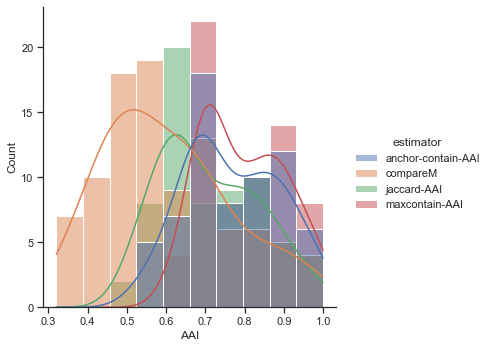

In [213]:
sns.displot(data=mean_cluster_aai, x="AAI", hue="estimator", kde=True)

In [214]:
mean_cluster_aai[mean_cluster_aai["estimator"] == "compareM"]

,cluster,estimator,AAI
1,VC1,compareM,0.878900
5,VC10,compareM,0.565415
9,VC100,compareM,0.679000
13,VC1000,compareM,0.654075
17,VC10000,compareM,0.361100
...,...,...,...
381,VC10083,compareM,0.338500
385,VC10084,compareM,0.527200
389,VC10085,compareM,0.466175
393,VC10086,compareM,0.501956


In [215]:
mean_cluster_aai[mean_cluster_aai["AAI"].isnull()]["estimator"].unique()#["cluster"].unique()

array(['anchor-contain-AAI', 'jaccard-AAI', 'maxcontain-AAI', 'compareM'],
      dtype=object)

In [216]:
mean_cluster_aai[mean_cluster_aai["AAI"].isnull()]["cluster"].unique()

array(['VC10000', 'VC10001', 'VC10002', 'VC10012', 'VC10013', 'VC10017',
       'VC10019', 'VC1002', 'VC10020', 'VC10027', 'VC10029', 'VC1003',
       'VC10031', 'VC10032', 'VC10033', 'VC10034', 'VC10036', 'VC10038',
       'VC10039', 'VC10041', 'VC10042', 'VC10051', 'VC10052', 'VC10055',
       'VC10060', 'VC10062', 'VC10063', 'VC10069', 'VC10070', 'VC10072',
       'VC10077', 'VC10081', 'VC10082', 'VC10083', 'VC10084', 'VC10087'],
      dtype=object)

In [217]:
mean_cluster_aai[(mean_cluster_aai["estimator"] == "compareM") & (mean_cluster_aai["AAI"].isnull())]#["cluster"].unique()

,cluster,estimator,AAI
73,VC10013,compareM,NaN
101,VC1002,compareM,NaN
161,VC10033,compareM,NaN


In [218]:
mean_cluster_aai[(mean_cluster_aai["estimator"] == "jaccard-AAI") & (mean_cluster_aai["AAI"].isnull())].nunique()

cluster      34
estimator     1
AAI           0
dtype: int64

In [327]:
# rename jaccard-AAI to protein-k7 AAI

mean_cluster_aai["estimator"].replace("jaccard-AAI", "protein-k10 AAI", inplace=True)
mean_cluster_aai

,cluster,estimator,AAI
0,VC1,anchor-contain-AAI,0.938921
1,VC1,compareM,0.878900
2,VC1,protein-k10 AAI,0.899073
3,VC1,maxcontain-AAI,0.938921
4,VC10,anchor-contain-AAI,0.662601
...,...,...,...
395,VC10086,maxcontain-AAI,0.713943
396,VC10087,anchor-contain-AAI,NaN
397,VC10087,compareM,0.350150
398,VC10087,protein-k10 AAI,NaN


In [326]:
# rename jaccard-AAI to protein-k7 AAI

mean_p7["estimator"].replace("jaccard-AAI", "protein-k7 AAI", inplace=True)
mean_p7

,cluster,estimator,AAI
0,VC1,anchor-contain-AAI,0.923298
1,VC1,compareM,0.878900
2,VC1,protein-k7 AAI,0.877941
3,VC1,maxcontain-AAI,0.929391
4,VC10,anchor-contain-AAI,0.491186
...,...,...,...
395,VC10086,maxcontain-AAI,0.608501
396,VC10087,anchor-contain-AAI,NaN
397,VC10087,compareM,0.350150
398,VC10087,protein-k7 AAI,NaN


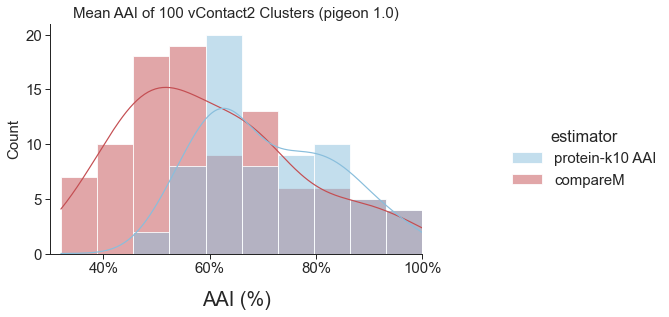

In [328]:
aai_colors = {"protein-k7 AAI":"#0b559f", "protein-k10 AAI":"#89bedc", "compareM":"#c44e52"}

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15}):
    sns.set_style("ticks")
    #g = sns.displot(data=mean_cluster_aai, x="AAI", hue="estimator", kind="kde", palette=aai_colors)
    g = sns.displot(data=mean_cluster_aai, x="AAI", hue="estimator", kde=True, palette=aai_colors, hue_order= ["protein-k10 AAI", "compareM"])
    g.set(xlim=(0.3, 1))
    plt.gcf().set_size_inches(10, 4)
    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100,decimals=0))
    plt.xlabel("AAI (%)", size=20, labelpad=15)
    #plt.ylabel("Cluster Count", size=20)
    #plt.ylabel("Percent of Clusters", size=20) # same as count, bc we have 100 clusters
    plt.title('Mean AAI of 100 vContact2 Clusters (pigeon 1.0)')

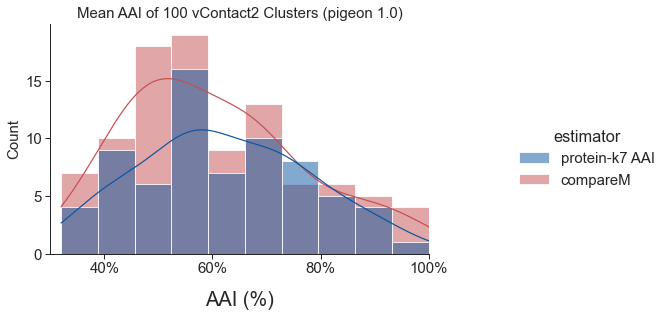

In [337]:
aai_colors = {"protein-k7 AAI":"#0b559f", "protein-k10 AAI":"#89bedc", "compareM":"#c44e52"}

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15}):
    sns.set_style("ticks")
    #g = sns.displot(data=mean_cluster_aai, x="AAI", hue="estimator", kind="kde", palette=aai_colors)
    g = sns.displot(data=mean_p7, x="AAI", hue="estimator", kde=True, palette=aai_colors2, hue_order= ["protein-k7 AAI", "compareM"])
    g.set(xlim=(0.3, 1))
    plt.gcf().set_size_inches(10, 4)
    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100,decimals=0))
    plt.xlabel("AAI (%)", size=20, labelpad=15)
    #plt.ylabel("Cluster Count", size=20)
    #plt.ylabel("Percent of Clusters", size=20) # same as count, bc we have 100 clusters
    plt.title('Mean AAI of 100 vContact2 Clusters (pigeon 1.0)')
    #g._legend.set_title("New Title")


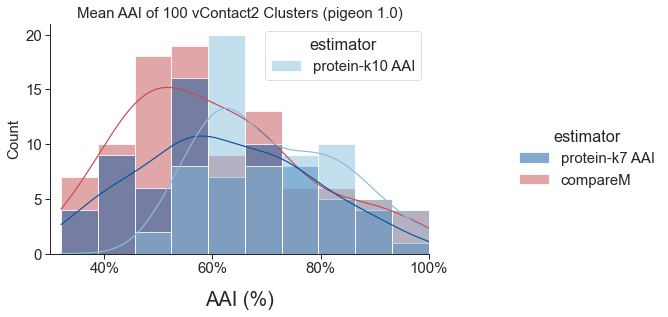

In [336]:
aai_colors = {"protein-k7 AAI":"#0b559f", "protein-k10 AAI":"#89bedc", "compareM":"#c44e52"}

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15}):
    sns.set_style("ticks")
    #g = sns.displot(data=mean_cluster_aai, x="AAI", hue="estimator", kind="kde", palette=aai_colors)
    g = sns.displot(data=mean_p7, x="AAI", hue="estimator", kde=True, palette=aai_colors2, hue_order= ["protein-k7 AAI", "compareM"])
    sns.histplot(data=mean_cluster_aai, x="AAI", hue="estimator", kde=True, palette=aai_colors, hue_order= ["protein-k10 AAI"])
    g.set(xlim=(0.3, 1))
    plt.gcf().set_size_inches(10, 4)
    for ax in g.axes.flat:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100,decimals=0))
    plt.xlabel("AAI (%)", size=20, labelpad=15)
    #plt.ylabel("Cluster Count", size=20)
    #plt.ylabel("Percent of Clusters", size=20) # same as count, bc we have 100 clusters
    plt.title('Mean AAI of 100 vContact2 Clusters (pigeon 1.0)')
    #g._legend.set_title("New Title")


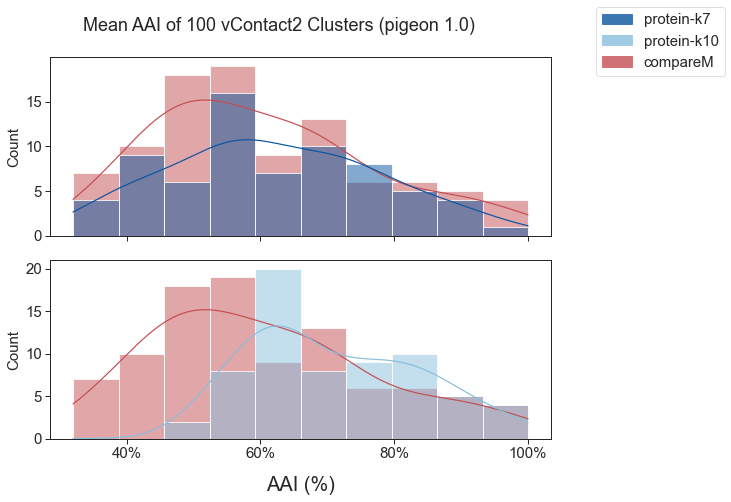

In [403]:
aai_colors = {"protein-k7 AAI":"#0b559f", "protein-k10 AAI":"#89bedc", "compareM":"#c44e52"}
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15}):
    sns.set_style("ticks")
    fig, axs = plt.subplots(2, 1, figsize=(8, 7), sharex='col', sharey='row')
    sns.histplot(data=mean_p7, x="AAI", hue="estimator", kde=True, palette=aai_colors2, hue_order= ["protein-k7 AAI", "compareM"], ax=axs[0], legend=False)
    sns.histplot(data=mean_cluster_aai, x="AAI", hue="estimator", kde=True, palette=aai_colors, hue_order= ["protein-k10 AAI", "compareM"], ax=axs[1], legend=False)
    for ax in axs:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    plt.xlabel("AAI (%)", size=20, labelpad=15)
    fig.suptitle('Mean AAI of 100 vContact2 Clusters (pigeon 1.0)')
    # create legend
    cm_patch = mpatches.Patch(color='#c44e52', label='compareM', alpha=0.8)
    k7_patch = mpatches.Patch(color='#0b559f', label='protein-k7', alpha=0.8)
    k10_patch = mpatches.Patch(color='#89bedc', label='protein-k10', alpha=0.8)
    fig.legend(handles=[k7_patch, k10_patch, cm_patch], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    fig.tight_layout()

In [272]:
mean_p7[(mean_p7["estimator"] == "compareM-") & (mean_p7["AAI"].isnull())].nunique()

cluster      3
estimator    1
AAI          0
dtype: int64

In [230]:
mean_p7[(mean_p7["estimator"] == "jaccard-AAI") & (mean_p7["AAI"].isnull())].nunique()

cluster      30
estimator     1
AAI           0
dtype: int64

In [236]:
no_hashAAI_cluster = mean_p7[(mean_p7["estimator"] == "jaccard-AAI") & (mean_p7["AAI"].isnull())]["cluster"]

<AxesSubplot:>

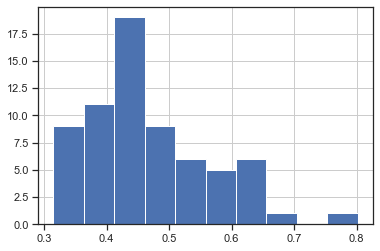

In [241]:
allp7[allp7["cluster"].isin(no_hashAAI_cluster)]["compareM"].hist()

<AxesSubplot:>

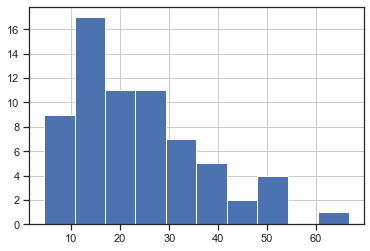

In [244]:
allp7[allp7["cluster"].isin(no_hashAAI_cluster)]["orthologous_fraction"].hist()

Text(0, 0.5, 'Cluster Count')

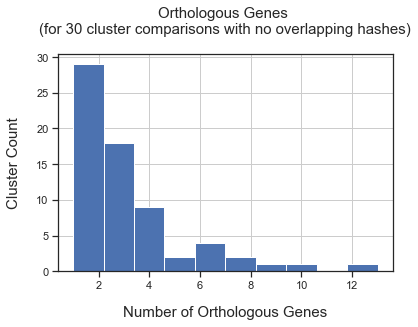

In [265]:
ax = allp7[(allp7["cluster"].isin(no_hashAAI_cluster))]["orthologous_genes"].hist()
ax.set_title("Orthologous Genes \n(for 30 cluster comparisons with no overlapping hashes)", pad=20, size=15)
plt.xlabel("Number of Orthologous Genes", size=15, labelpad=15)
plt.ylabel("Cluster Count", size=15, labelpad=15)

In [273]:
# let's look at the ones where compareM reports an AAI, but we do not
no_jaai = allp7[(allp7["cluster"].isin(no_hashAAI_cluster)) &  (allp7["compareM"].notnull())]
no_jaai

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
26,GOV_28309_x_GOV_36641,GOV_28309,GOV_36641,VC10000,36.63,5.27,39.0,41.0,3.0,7.69,...,NaN,NaN,96,86,0,protein-7,NaN,NaN,NaN,0.3663
28,GOV_28309_x_GOV_46510,GOV_28309,GOV_46510,VC10000,35.59,2.56,39.0,33.0,6.0,18.18,...,NaN,NaN,96,60,0,protein-7,NaN,NaN,NaN,0.3559
29,GOV_111606_x_GOV_137701,GOV_111606,GOV_137701,VC10001,66.90,19.07,15.0,18.0,7.0,46.67,...,NaN,NaN,35,37,0,protein-7,NaN,NaN,NaN,0.6690
60,GOV_29868_x_GOV_32221,GOV_29868,GOV_32221,VC10015,45.51,7.88,46.0,51.0,6.0,13.04,...,NaN,NaN,107,87,0,protein-7,NaN,NaN,NaN,0.4551
61,GOV_29868_x_GOV_37563,GOV_29868,GOV_37563,VC10015,42.78,4.07,46.0,31.0,5.0,16.13,...,NaN,NaN,107,84,0,protein-7,NaN,NaN,NaN,0.4278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,GOV_127307_x_GOV_161095,GOV_127307,GOV_161095,VC10081,38.98,3.23,5.0,6.0,2.0,40.00,...,NaN,NaN,52,40,0,protein-7,NaN,NaN,NaN,0.3898
237,GOV_127351_x_GOV_86407,GOV_127351,GOV_86407,VC10082,43.76,7.52,17.0,22.0,6.0,35.29,...,NaN,NaN,41,30,0,protein-7,NaN,NaN,NaN,0.4376
238,GOV_127519_x_GOV_155762,GOV_127519,GOV_155762,VC10083,33.85,NaN,6.0,4.0,1.0,25.00,...,NaN,NaN,37,37,0,protein-7,NaN,NaN,NaN,0.3385
257,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,36.08,1.73,15.0,56.0,3.0,20.00,...,NaN,NaN,34,140,0,protein-7,NaN,NaN,NaN,0.3608


In [274]:
no_jaai.groupby("cluster").mean()

,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
cluster,,,,,,,,,,,,,,,,,,
VC10000,36.110000,3.915000,39.0,37.000000,4.500000,12.935000,7.0,100.0,NaN,NaN,NaN,96.0,73.000000,0.0,NaN,NaN,NaN,0.361100
VC10001,66.900000,19.070000,15.0,18.000000,7.000000,46.670000,7.0,100.0,NaN,NaN,NaN,35.0,37.000000,0.0,NaN,NaN,NaN,0.669000
VC10015,44.796667,5.136667,46.0,33.666667,5.333333,18.496667,7.0,100.0,NaN,NaN,NaN,107.0,71.000000,0.0,NaN,NaN,NaN,0.447967
VC10017,36.430000,3.860000,164.0,138.000000,13.000000,9.420000,7.0,100.0,NaN,NaN,NaN,265.0,250.000000,0.0,NaN,NaN,NaN,0.364300
VC10018,63.330000,15.660000,15.0,23.000000,3.000000,20.000000,7.0,100.0,NaN,NaN,NaN,42.0,29.000000,0.0,NaN,NaN,NaN,0.633300
VC10019,45.730000,8.020000,25.0,33.000000,3.000000,12.000000,7.0,100.0,NaN,NaN,NaN,43.0,40.000000,0.0,NaN,NaN,NaN,0.457300
VC10020,32.000000,1.506667,45.0,39.333333,2.333333,7.036667,7.0,100.0,NaN,NaN,NaN,118.0,78.333333,0.0,NaN,NaN,NaN,0.320000
VC10026,50.100000,9.080000,13.0,22.500000,3.000000,23.080000,7.0,100.0,NaN,NaN,NaN,35.0,67.000000,0.0,NaN,NaN,NaN,0.501000
VC10027,43.800000,1.300000,25.0,20.000000,3.000000,15.000000,7.0,100.0,NaN,NaN,NaN,54.0,44.000000,0.0,NaN,NaN,NaN,0.438000


Text(0, 0.5, 'Cluster Count')

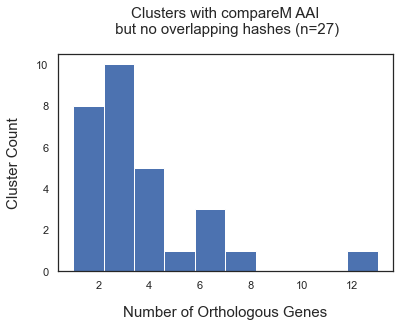

In [283]:
g = no_jaai.groupby("cluster").mean()["orthologous_genes"].hist()
g.set_title("Clusters with compareM AAI\n but no overlapping hashes (n=27)", pad=20, size=15)
g.grid(False)
plt.xlabel("Number of Orthologous Genes", size=15, labelpad=15)
plt.ylabel("Cluster Count", size=15, labelpad=15)

In [321]:
no_jaai_means = no_jaai.groupby("cluster").mean()
no_jaai_means["min_num_genes"] =  no_jaai_means[["genes_in_anchor","genes_in_ref"]].min(axis = 1)
no_jaai_means.drop(columns=["jaccard", "scaled", "ksize", "max_containment", "anchor_containment", "jaccard-AAI", "maxcontain-AAI", "anchor-contain-AAI"], inplace=True)
no_jaai_means

,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,anchor_hashes,query_hashes,num_common,compareM,min_num_genes
cluster,,,,,,,,,,,
VC10000,36.110000,3.915000,39.0,37.000000,4.500000,12.935000,96.0,73.000000,0.0,0.361100,37.000000
VC10001,66.900000,19.070000,15.0,18.000000,7.000000,46.670000,35.0,37.000000,0.0,0.669000,15.000000
VC10015,44.796667,5.136667,46.0,33.666667,5.333333,18.496667,107.0,71.000000,0.0,0.447967,33.666667
VC10017,36.430000,3.860000,164.0,138.000000,13.000000,9.420000,265.0,250.000000,0.0,0.364300,138.000000
VC10018,63.330000,15.660000,15.0,23.000000,3.000000,20.000000,42.0,29.000000,0.0,0.633300,15.000000
VC10019,45.730000,8.020000,25.0,33.000000,3.000000,12.000000,43.0,40.000000,0.0,0.457300,25.000000
VC10020,32.000000,1.506667,45.0,39.333333,2.333333,7.036667,118.0,78.333333,0.0,0.320000,39.333333
VC10026,50.100000,9.080000,13.0,22.500000,3.000000,23.080000,35.0,67.000000,0.0,0.501000,13.000000
VC10027,43.800000,1.300000,25.0,20.000000,3.000000,15.000000,54.0,44.000000,0.0,0.438000,20.000000


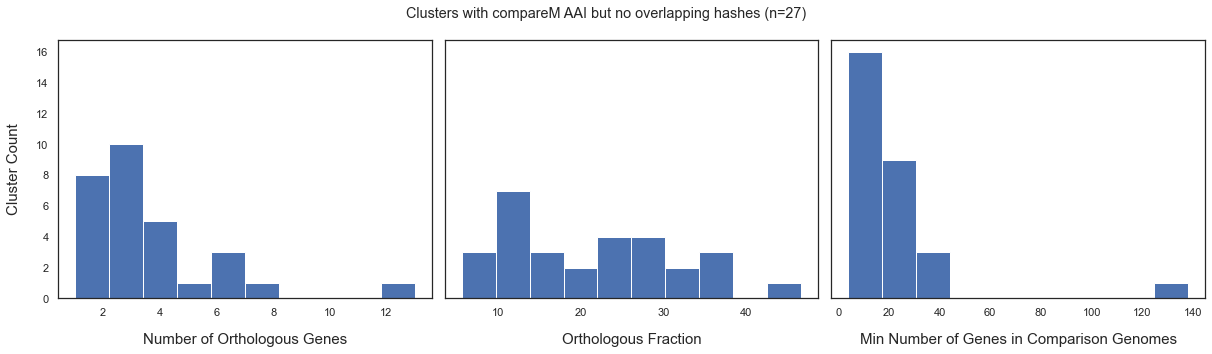

In [318]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(17,5))
fig.suptitle("Clusters with compareM AAI but no overlapping hashes (n=27)")#, pad=20, size=15)
ax1.hist(no_jaai_means["orthologous_genes"])
ax1.set_xlabel("Number of Orthologous Genes", size=15, labelpad=15)
ax1.set_ylabel("Cluster Count", size=15, labelpad=15)
ax2.set_xlabel("Orthologous Fraction", size=15, labelpad=15)
ax2.hist(no_jaai_means["orthologous_fraction"])
ax3.hist(no_jaai_means["min_num_genes"])
ax3.set_xlabel("Min Number of Genes in Comparison Genomes", size=15, labelpad=15) 
fig.tight_layout()

In [ ]:
ax = allp7[(allp7.groupby("cluster")["cluster"].isin(no_hashAAI_cluster))]["orthologous_genes"].hist()
ax.set_title("Orthologous Genes \n(for 30 cluster comparisons with no overlapping hashes)", pad=20, size=15)
plt.xlabel("Number of Orthologous Genes", size=15, labelpad=15)
plt.ylabel("Cluster Count", size=15, labelpad=15)

In [245]:
allp7[allp7["cluster"].isin(no_hashAAI_cluster)]

,comparison_name,anchor_name,ref_name,cluster,mean_aai,std_aai,genes_in_anchor,genes_in_ref,orthologous_genes,orthologous_fraction,...,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize,jaccard-AAI,maxcontain-AAI,anchor-contain-AAI,compareM
26,GOV_28309_x_GOV_36641,GOV_28309,GOV_36641,VC10000,36.63,5.27,39.0,41.0,3.0,7.69,...,NaN,NaN,96,86,0,protein-7,NaN,NaN,NaN,0.3663
27,GOV_28309_x_GOV_41672,GOV_28309,GOV_41672,VC10000,NaN,NaN,39.0,34.0,NaN,NaN,...,NaN,NaN,96,87,0,protein-7,NaN,NaN,NaN,NaN
28,GOV_28309_x_GOV_46510,GOV_28309,GOV_46510,VC10000,35.59,2.56,39.0,33.0,6.0,18.18,...,NaN,NaN,96,60,0,protein-7,NaN,NaN,NaN,0.3559
29,GOV_111606_x_GOV_137701,GOV_111606,GOV_137701,VC10001,66.90,19.07,15.0,18.0,7.0,46.67,...,NaN,NaN,35,37,0,protein-7,NaN,NaN,NaN,0.6690
60,GOV_29868_x_GOV_32221,GOV_29868,GOV_32221,VC10015,45.51,7.88,46.0,51.0,6.0,13.04,...,NaN,NaN,107,87,0,protein-7,NaN,NaN,NaN,0.4551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,GOV_127307_x_GOV_161095,GOV_127307,GOV_161095,VC10081,38.98,3.23,5.0,6.0,2.0,40.00,...,NaN,NaN,52,40,0,protein-7,NaN,NaN,NaN,0.3898
237,GOV_127351_x_GOV_86407,GOV_127351,GOV_86407,VC10082,43.76,7.52,17.0,22.0,6.0,35.29,...,NaN,NaN,41,30,0,protein-7,NaN,NaN,NaN,0.4376
238,GOV_127519_x_GOV_155762,GOV_127519,GOV_155762,VC10083,33.85,NaN,6.0,4.0,1.0,25.00,...,NaN,NaN,37,37,0,protein-7,NaN,NaN,NaN,0.3385
257,GOV_129416_x_GOV_13242,GOV_129416,GOV_13242,VC10087,36.08,1.73,15.0,56.0,3.0,20.00,...,NaN,NaN,34,140,0,protein-7,NaN,NaN,NaN,0.3608
